# Importing the Libraries

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
data = pd.read_csv('../input/train_V2.csv')
datanew = data.copy()
data2 = pd.read_csv('../input/test_V2.csv')

In [53]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


## Taking a sample of 50000 datapoints as dataset is very large

In [54]:
data = data.iloc[:50000,:]

## Checking for null values in the dataset

In [55]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [56]:
data1 = data.copy()

## Dropping Irrelevant attributes

In [57]:
data1.drop(['Id','groupId','matchId','matchType'],inplace=True,axis=1)
data2.drop(['groupId','matchId','matchType'],inplace=True,axis=1)

## Heatmap of correlation matrix

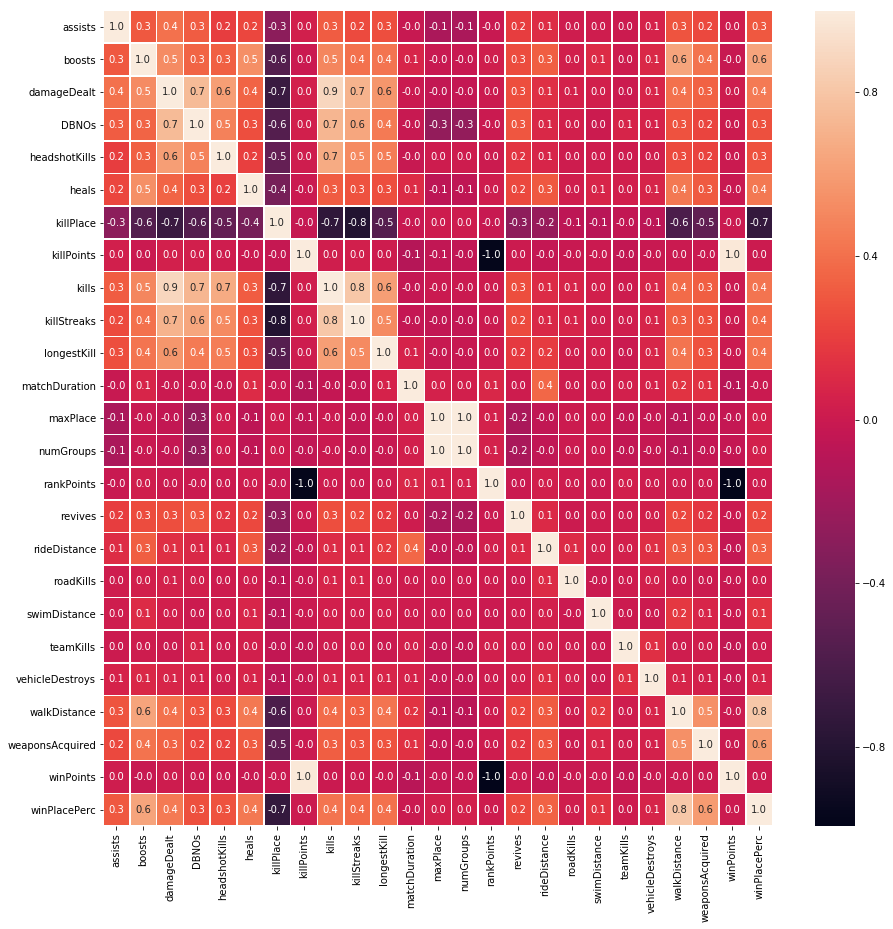

In [58]:
f,ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(data1.corr(),annot=True,fmt= '.1f',linewidths=.5)
plt.show()

## Top 5 attributes correlated to winPlacePerc

In [59]:
m = data1.corr()['winPlacePerc']
m.sort_values(ascending=False).head(6)

winPlacePerc       1.000000
walkDistance       0.809363
boosts             0.634230
weaponsAcquired    0.592937
damageDealt        0.442064
heals              0.433141
Name: winPlacePerc, dtype: float64

# Univariate Analysis

## 1. matchType

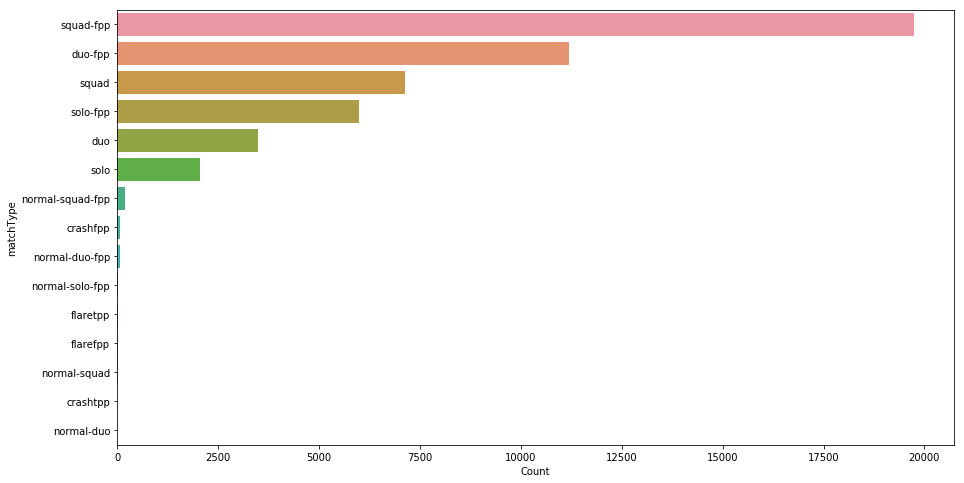

In [60]:
f,ax = plt.subplots(figsize=(15,8))
sns.barplot(data.matchType.value_counts().values,data.matchType.value_counts().index)
plt.xlabel('Count')
plt.ylabel('matchType')
plt.show()

## 2. assists - Number of enemy players this player damaged that were killed by teammates.

### Number of assists greater than 0

In [61]:
d = data1.assists.value_counts()
d = d[d.index>0]

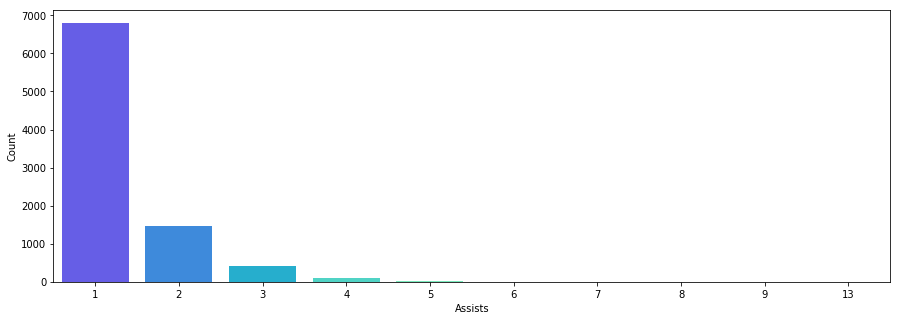

In [62]:
f,ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(d.index,d.values,palette='rainbow')
plt.xlabel('Assists')
plt.ylabel('Count')
plt.show()

## 3. DBNOs - Number of enemy players knocked. 

### Maximum number of enemy players knocked by a player ranges between 0 and 5

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


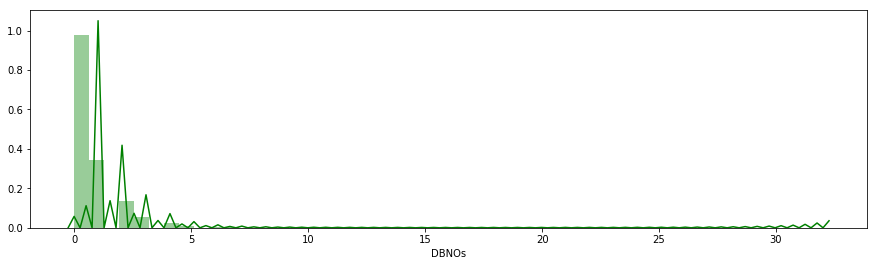

In [63]:
f,ax = plt.subplots(figsize=(15,4))
ax = sns.distplot(data1.DBNOs,color='green')
plt.show()

## 4. matchDuration - Duration of match in seconds.

### Most of the players play a match for around 1200 sec to 1800 sec

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


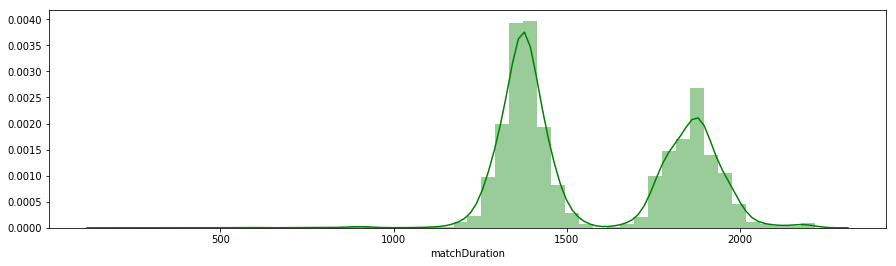

In [64]:
f,ax = plt.subplots(figsize=(15,4))
ax = sns.distplot(data1.matchDuration,color='green')
plt.show()

## 5. kills - Number of enemy players killed.

In [65]:
d = data1.kills.value_counts()
d = d[d.index>0]

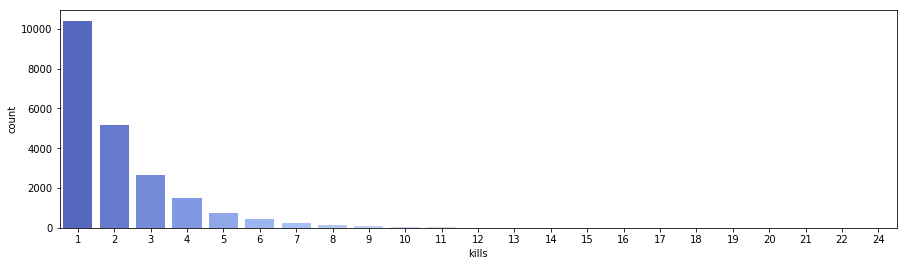

In [66]:
f,ax = plt.subplots(figsize=(15,4))
ax = sns.barplot(d.index,d.values,palette = 'coolwarm')
plt.xlabel('kills')
plt.ylabel('count')
plt.show()

# Bivariate  analysis

## winPlacePerc vs walkDistance

- walkDistance shows strong positive correlation with winPlacePerc with a value of ,r = 0.8
- winPlacePerc increases with increse in walkDistance

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


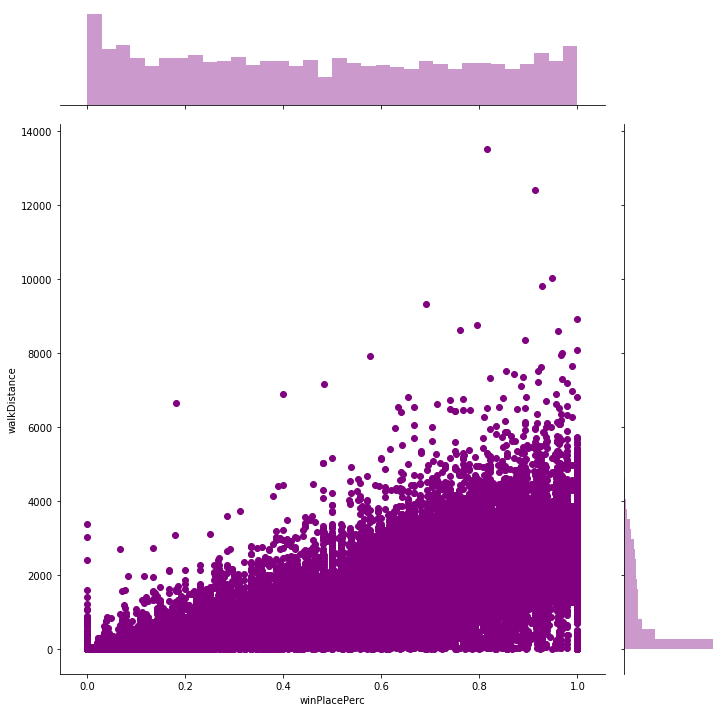

In [67]:
sns.jointplot(x ='winPlacePerc',y='walkDistance',data = data1,height= 10,color='purple')
plt.show()

## winPlacePerc vs boosts

- we can see that number of boost items used is also positively correlated to winPlacePerc

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


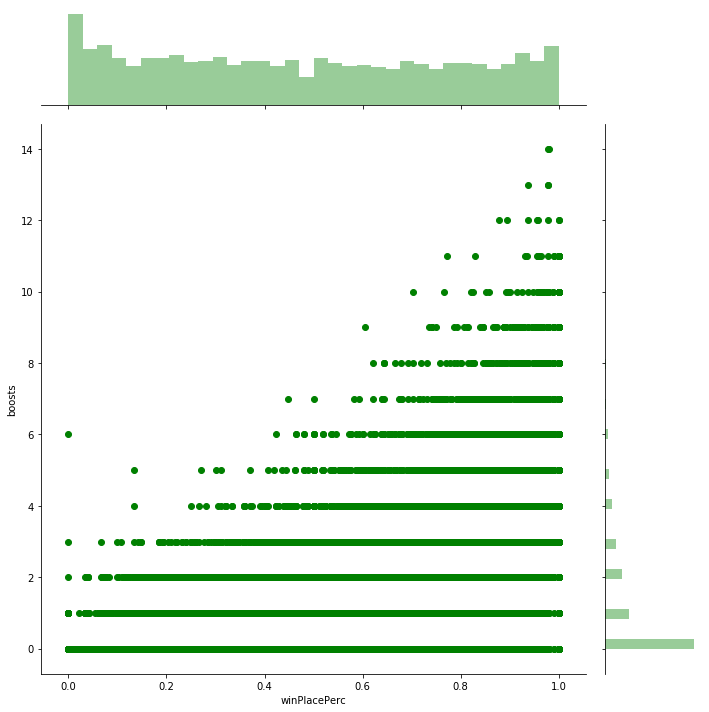

In [68]:
ax = sns.jointplot(x ='winPlacePerc',y='boosts',data = data1,height=10,color='green')
plt.show()

## winPlacePerc vs weaponsAcquired

- Number of weapons picked up is positively correlated to winPlacePerc

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


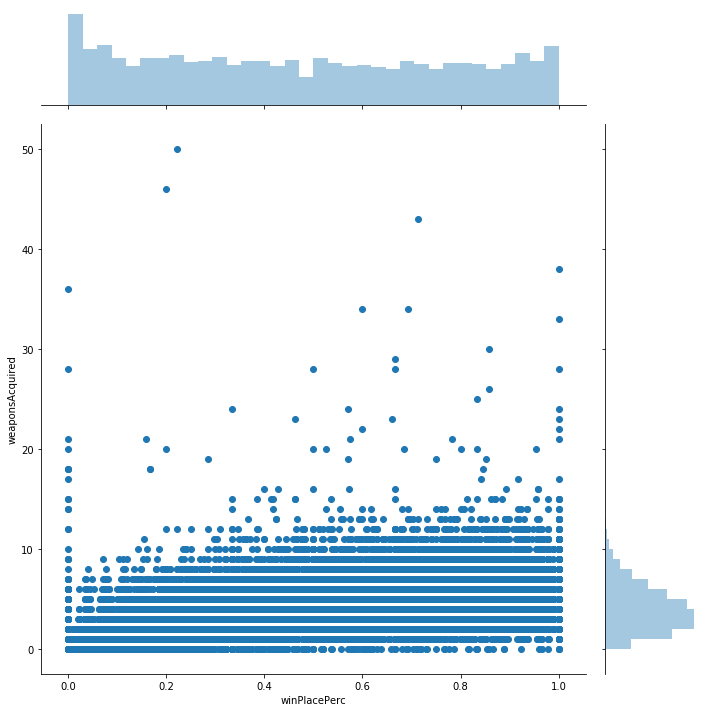

In [69]:
ax = sns.jointplot(data1.winPlacePerc,data1.weaponsAcquired,height=10)
plt.show()

## winPlacePerc vs damageDealt

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


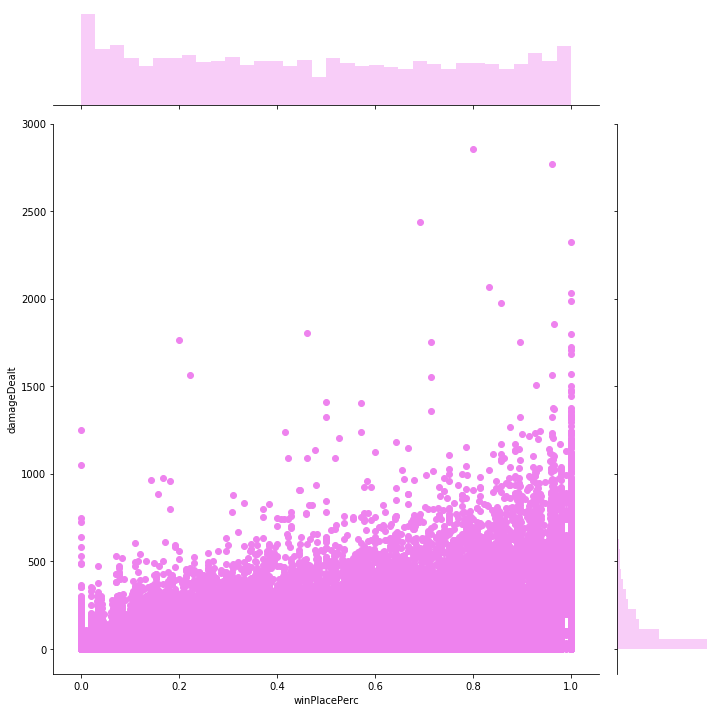

In [70]:
ax = sns.jointplot(data1.winPlacePerc,data1.damageDealt,height = 10,color ='violet')
plt.show()

## winPlacePerc vs heals

- Number of healing items used is also positively correlated to winPlacePerc
- winPlacePerc increases with increase in number of healing items used

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


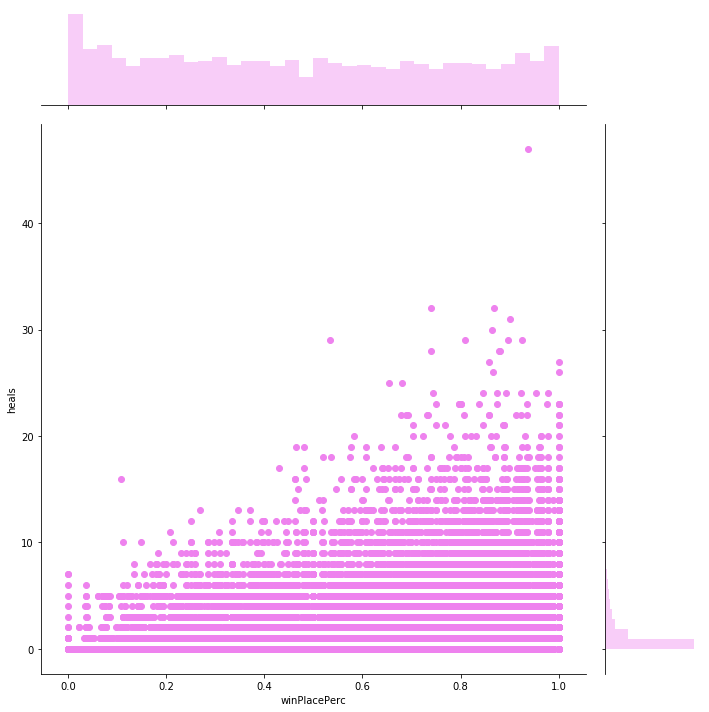

In [71]:
ax = sns.jointplot(data1.winPlacePerc,data1.heals,height= 10,color='violet')
plt.show()

# Splitting Data into Training and Test set

In [72]:
X = data1.iloc[:,:24].values
Y = data1.iloc[:,-1].values
X_ = data2.iloc[:,1:].values

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30)

## Feature Scaling

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

# Training model using Regression

- First I have trained the model using multivariate regression
- But it gives accuracy around 83% on test set

In [75]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,Y_train)
lin.score(X_test,Y_test)

0.8324980603900892

# Training model using RandomForestRegressor

- maximum depth of the tree = 10
- n_estimators parameter defines number of trees in the random forest.
- n_estimators = 100
- I have used mean squared error as the criterion to measure the quality of a split and we can also use mean absolute error.

In [76]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth = 10,criterion='mse',n_estimators=100)
reg.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# Predicting on test set

In [77]:
Y_pred = reg.predict(X_test)

In [78]:
from sklearn.metrics import r2_score
sc = r2_score(Y_test,Y_pred)
sc

0.9039319196553787

In [79]:
d3 = pd.DataFrame()
test_pred = reg.predict(X_)


In [80]:
d3['Id'] = data2['Id']
d3['winPlacePerc'] = test_pred
d3.to_csv('sample_submission_V2.csv',index=False)